In [1]:
import os 
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import preprocessing


%matplotlib inline

### Below is how we'd normally connect to our MySQL Database:

In [6]:
host1 = os.getenv('MYSQL_HOST')
port1 = os.getenv('MYSQL_PORT')
user1 = os.getenv('MYSQL_USER')
password1 = os.getenv('MYSQL_PASSWORD')
database1 = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(
    host=host1,
    port=port1,
    user=user1,
    passwd=password1,
    db=database1,
    charset='utf8mb4')

OperationalError: (1045, "Access denied for user 'victorclarke'@'cloudsqlproxy~134.241.223.12' (using password: NO)")

### However since we're using a proxy, we'll have to connect as so:

In [61]:
db_user= 'vclarke'
password= 'EF;p6swm'
db_connection = pymysql.connect(host="127.0.0.1",   
                     user=db_user,     
                     passwd=password, 
                     port=3309,
                     db = 'safe_water')  

In [70]:
group_codes_df = pd.read_sql('SELECT * FROM CONTAMINANT_GROUP_CODES', db_connection)
group_codes_df = pd.read_sql('SELECT * FROM CONTAMINANT_GROUP_CODES', db_connection)
group_codes_df = pd.read_sql('SELECT * FROM CONTAMINANT_GROUP_CODES', db_connection)

In [45]:
# show all tables in db
cmd = """
show tables
"""
pd.read_sql(cmd, db_connection)

,Tables_in_safe_water
0,CONTAMINANT_CODES
1,CONTAMINANT_GROUP_CODES
2,DG_LCR_SAMPLE_RESULT
3,ENFORCEMENT_ACTION
4,GEOGRAPHIC_AREA
5,LCR_SAMPLE
6,SERVICE_AREA
7,TREATMENT
8,VIOLATION
9,VIOLATION_ENF_ASSOC


In [58]:
# show a few rows
cmd = """
select * from VIOLATION 
"""
df = pd.read_sql(cmd, db_connection)

In [66]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2212441,2212442,2212443,2212444,2212445,2212446,2212447,2212448,2212449,2212450
PWSID,MS0730004,NC0319125,NY1316696,WV3305539,FL3590699,MI3420177,PA7010048,AZ0413116,IN2570051,OK3006109,...,PR0556065,NC0144439,TX1011084,IN5252010,MS0540009,MT0002021,PA3546481,IL3152892,VA2171075,PWSID
ID,00000444-92b9-428b-9953-461a5adb95ad,000009c8-ac45-4739-9460-06b8b3bc1335,00000e0a-44f5-4809-8fa4-d03c59fe6030,0000114b-e6eb-4548-8b8a-350803638ca9,00001717-1a64-490d-a370-2e782643b91b,00001d9d-115b-4e78-83b5-20bdeb997ea4,000023f4-a59e-4461-a816-70a3152e7142,00002eb1-1fa2-460a-9be4-be760a5a972e,000032aa-f8bc-43bf-8647-562550360542,0000384d-1147-4c9f-9a20-326984ce03e4,...,ffffc659-edd7-4ab7-a7e4-e4a3a4a41288,ffffc88f-625d-4a05-9ede-3e19fd1238b7,ffffc9e2-2f0d-416f-a047-0fb4313a91ed,ffffd70a-40c4-40de-ad57-0545c0515c8f,ffffe21a-82b0-4879-8279-143a2e47f173,ffffe806-f03f-4e22-a682-beaf279206eb,ffffec28-9621-449b-be3a-785e2fc10ae1,ffffec66-f39b-4a05-b6c3-91bab8909681,fffffb6c-0fca-43ba-841d-1cf28083e837,ID
VIOLATION_ID,20414,4005,44051,60895,8510219,11116331085,1416332,829,605,88492,...,2905696,505,737,40801,48141,530395,1520989,10610,2557498,VIOLATION_ID
FACILITY_ID,33301,5004,,,,,101,10472,,,...,,,52394,,31621,,101,,,FACILITY_ID
POPULATION_SERVED_COUNT,2553,60,104,123,773,197,760,1200,100,300,...,157,85,123,25,2043,25,25,70,84,0
NPM_CANDIDATE,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,NPM_CANDIDATE
PWS_ACTIVITY_CODE,A,I,A,A,I,I,A,A,A,A,...,I,A,A,A,A,A,A,A,I,PWS_ACTIVITY_CODE
PWS_DEACTIVATION_DATE,,22-DEC-16,,,22-JUN-12,13-AUG-13,,,,,...,19-FEB-10,,,,,,,,18-SEP-10,PWS_DEACTIVATION_DATE
PRIMARY_SOURCE_CODE,GW,GW,GW,GWP,GW,GW,GW,GW,GW,SWP,...,SW,GW,GW,GW,GW,GW,GW,GW,GW,PRIMARY_SOURCE_CODE
POP_CAT_5_CODE,2,1,1,1,2,1,2,2,1,1,...,1,1,1,1,2,1,1,1,1,0


In [62]:
cmd = """
select * from CONTAMINANT_CODES
limit 100
"""
contaminants_df = pd.read_sql(cmd, db_connection)

In [63]:
contaminants_df

,CODE,NAME,SCIENTIFIC_NAME,TYPE_CODE
0,0100,TURBIDITY,None,WQ
1,0200,SWTR,None,RL
2,0300,IESWTR,None,RL
3,0400,DBP STAGE 1,None,RL
4,0500,FILTER BACKWASH RULE,None,RL
5,0600,DBP STAGE 2,None,RL
6,0700,GROUNDWATER RULE,None,RL
7,0800,LT2ESWTR,None,RL
8,0999,CHLORINE,None,WQ
9,1***,ALL NIPDWR INORGANIC CONTAMINANTS,None,GC


Text(0, 0.5, 'number of violations')

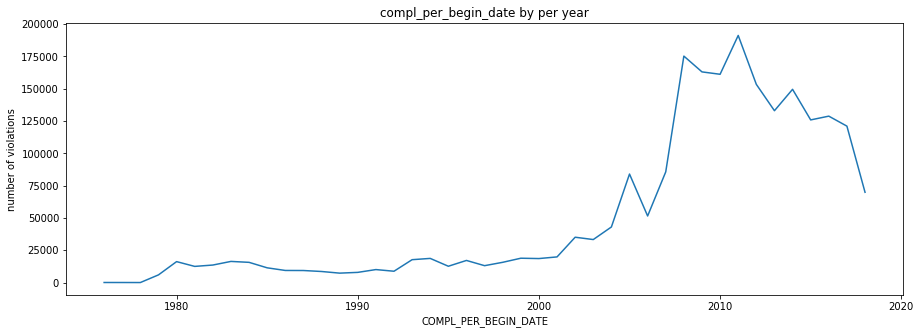

In [61]:
cmd = """
select 
    COMPL_PER_BEGIN_DATE,
    count(*) rowcount
from VIOLATION 
WHERE COMPL_PER_BEGIN_DATE between '1950-01-01' and '2020-01-01'
group by 1
"""
tmp = pd.read_sql(cmd, db_connection)
tmp['COMPL_PER_BEGIN_DATE'] = pd.to_datetime(tmp['COMPL_PER_BEGIN_DATE'], format='%Y-%m-%d')

tmp.groupby(tmp['COMPL_PER_BEGIN_DATE'].dt.year).rowcount.sum().plot(figsize=(15,5), title='compl_per_begin_date by per year')
plt.ylabel('number of violations')

Text(0, 0.5, 'number of violations')

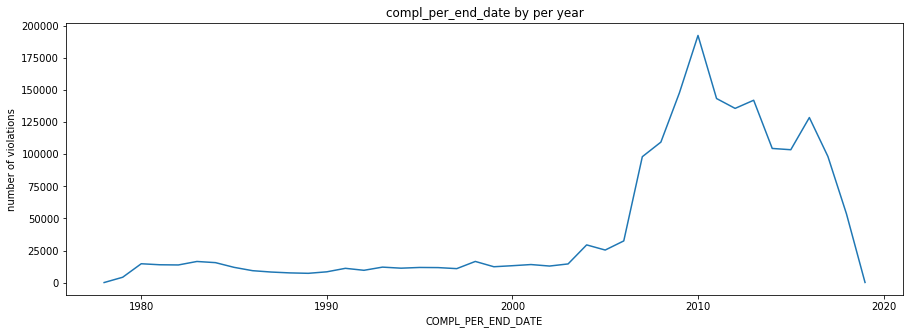

In [62]:
cmd = """
select 
    COMPL_PER_END_DATE,
    count(*) rowcount
from VIOLATION 
WHERE COMPL_PER_END_DATE between '1950-01-01' and '2020-01-01'
group by 1
"""
tmp = pd.read_sql(cmd, db_connection)
tmp['COMPL_PER_END_DATE'] = pd.to_datetime(tmp['COMPL_PER_END_DATE'], format='%Y-%m-%d')

tmp.groupby(tmp['COMPL_PER_END_DATE'].dt.year).rowcount.sum().plot(figsize=(15,5), title='compl_per_end_date by per year')
plt.ylabel('number of violations')

Text(0, 0.5, 'number of violations')

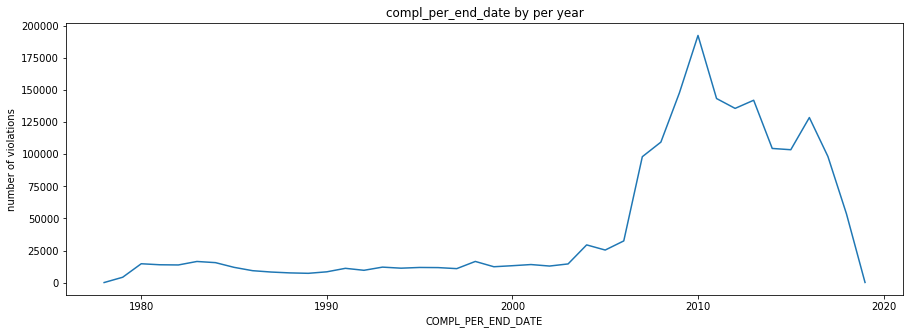

In [63]:
cmd = """
select 
    COMPL_PER_END_DATE,
    count(*) rowcount
from VIOLATION 
WHERE COMPL_PER_END_DATE between '1950-01-01' and '2020-01-01'
group by 1
"""
tmp = pd.read_sql(cmd, db_connection)
tmp['COMPL_PER_END_DATE'] = pd.to_datetime(tmp['COMPL_PER_END_DATE'], format='%Y-%m-%d')

tmp.groupby(tmp['COMPL_PER_END_DATE'].dt.year).rowcount.sum().plot(figsize=(15,5), title='compl_per_end_date by per year')
plt.ylabel('number of violations')

In [66]:
# show a few rows
cmd = """
select FACILITY_ID, count(*)
from VIOLATION 
where FACILITY_ID is not NULL
group by 1
order by 2 desc
"""
df = pd.read_sql(cmd, db_connection)

In [69]:
df.head(20)

,FACILITY_ID,count(*)
0,,1348267
1,101,77548
2,100,24112
3,001,16606
4,102,13723
5,1,12222
6,000,8490
7,002,7072
8,103,5052
9,003,4358


In [48]:
cmd = """
select * from WATER_SYSTEM
"""
df1 = pd.read_sql(cmd, db_connection)

In [167]:
df1.head()

,PWSID,PWS_NAME,NPM_CANDIDATE,PRIMACY_AGENCY_CODE,EPA_REGION,SEASON_BEGIN_DATE,SEASON_END_DATE,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,...,CITY_NAME,ZIP_CODE,COUNTRY_CODE,STATE_CODE,SOURCE_WATER_PROTECTION_CODE,SOURCE_PROTECTION_BEGIN_DATE,OUTSTANDING_PERFORMER,OUTSTANDING_PERFORM_BEGIN_DATE,CITIES_SERVED,COUNTIES_SERVED
0,010106001,Mashantucket Pequot Water System,1,01,1,None,None,A,None,CWS,...,MASHANTUCKET,06339-3060,US,CT,None,None,None,None,Not Reported,Not Reported
1,010109001,Mohegan Sun RETAIL/CASINO/HOTEL/ETC,0,01,1,01-01,12-31,I,2000-01-01,NTNCWS,...,None,None,None,None,None,None,None,None,Not Reported,Not Reported
2,010109005,Mohegan Tribal Utility Authority,1,01,1,None,None,A,None,CWS,...,Uncasville,06382,US,CT,None,None,None,None,Not Reported,Not Reported
3,010307001,Aquinnah Wampanoag,1,01,1,None,None,A,None,CWS,...,Chilmark,02535,US,MA,None,None,None,None,Not Reported,Not Reported
4,010502001,NARRAGANSETT INDIAN LONGHOUSE,0,01,1,01-01,12-31,I,2005-08-02,TNCWS,...,CHARLESTOWN,02813,US,RI,None,None,None,None,Not Reported,Not Reported


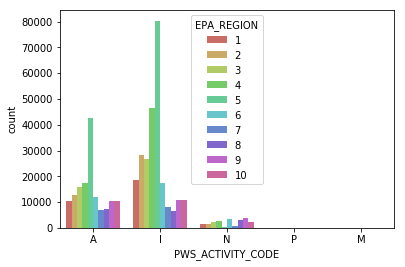

In [109]:
sns.countplot(x=df1['PWS_ACTIVITY_CODE'], data=df1, hue='EPA_REGION', palette='hls')
plt.show()

## Above we can see a plot of the different activity codes by regions. 
- There are a few imbalances within the inactive water systems (I), but if we look at the active water systems (A) we see that the number of water systems is more or less uniform besides EPA_Region 5. 
- EPA_Region 5 encompasses MN, WI, MI, IL, IN, OH



# Moving forward with the analysis:
## So we're going to perform the training set of the Logistic Regression all past systems (active and deactivated), then we're going to predict the test set on the active systems. (We can possibly perform two separate sessions (One in which we include the deactivated water systems and one in which we only train and test on the active systems). 

## Before we start the Logistic Regression, we have to ensure the integrity/independent of the features. Let's do some exploratory analysis and then some covariance/correlation testing: 

In [3]:
cmd = """
SELECT *
FROM DG_LCR_SAMPLE_RESULT
"""

sample_test = pd.read_sql(cmd, db_connection)

In [12]:
sample_test.SAMPLE_MEASURE.value_counts().head()

0.000    58886
0.001    15344
0.002    11636
0.003     8375
0.005     6354
Name: SAMPLE_MEASURE, dtype: int64

In [13]:
sample_test.CONTAMINANT_CODE.value_counts()

PB90    215734
CU90      7642
Name: CONTAMINANT_CODE, dtype: int64

### Unfornatuely with our sample data, it appears to only contains Copper (CU90) and Lead (PB90) data. Let's just visualize what this looks like over the years: 

In [6]:
cmd = """
SELECT *
FROM LCR_SAMPLE
"""

lcr_sample_test = pd.read_sql(cmd, db_connection)

In [14]:
lcr_sample_test

,SAMPLE_ID,ID,PWSID,SAMPLING_END_DATE,SAMPLING_START_DATE,PRIMACY_AGENCY_CODE,EPA_REGION
0,65158642,00002e2b-cb5a-4345-ac8d-7fce9a1d7d43,WI2410118,2018-09-30,2018-06-01,WI,5
1,FL156904,00004770-7c09-4227-aada-8cc073e0df36,FL4134300,2017-12-01,2017-01-01,FL,4
2,191006111217LT2,000083b8-f822-4dcd-82cb-0e3493f001d7,CA1910061,2011-12-31,2011-01-01,CA,9
3,NV15795,0000a3f2-7bed-45cf-ab66-2e9cf0299282,NV0001113,2015-06-30,2015-01-01,NV,9
4,CA52304,0000ab76-4b38-4667-b2a4-da8a983e6efb,CA4900575,2015-12-31,2013-01-01,CA,9
5,NE9092,0001024a-a320-4d22-9b67-d8195a94255d,NE3113501,2014-12-31,2012-01-01,NE,7
6,490051210207LT4,0001126f-fe32-40a3-8834-b28e3fd5cb31,CA4900512,2010-12-31,2010-01-01,CA,9
7,LA190657,000160e5-1709-4deb-b84c-fcfb60797fa6,LA1019073,2013-12-31,2011-01-01,LA,6
8,OH68572,000161e7-f29b-414b-9e09-0efbbbb0f240,OH4638912,2018-12-31,2016-01-01,OH,5
9,32300383,00018e49-a453-4097-89ce-952228218670,WI6470107,2011-09-30,2011-06-01,WI,5


### Merge the two dataframes together:


In [22]:
merged_sample_data = sample_test.merge(lcr_sample_test, how='outer', on='SAMPLE_ID', indicator=True)

In [23]:
merged_sample_data = merged_sample_data[merged_sample_data.columns.drop(list(merged_sample_data.filter(regex='_y')))]

In [24]:
merged_sample_data.rename(index=str, columns={"PWSID_x": "PWSID", "PRIMACY_AGENCY_CODE_x": "PRIMACY_AGENCY_CODE", "EPA_REGION_x" : 'EPA_REGION'}, inplace=True)

In [25]:
merged_sample_data

,PWSID,SAMPLE_ID,PRIMACY_AGENCY_CODE,EPA_REGION,SAR_ID,CONTAMINANT_CODE,RESULT_SIGN_CODE,SAMPLE_MEASURE,UNIT_OF_MEASURE,ID,SAMPLING_END_DATE,SAMPLING_START_DATE,_merge
0,AL0001424,S11,AL,4,4836226,PB90,,0.0030,mg/L,9d281077-41d9-4591-8409-1d582aa51cd2,2012-01-31,2001-01-01,both
1,MT0001738,MT11657,MT,8,12132133,PB90,,0.0000,mg/L,60a5daf1-3af5-4af4-9d5b-2ee24c0401b1,2010-12-31,2002-01-01,both
2,MT0001580,MT11452,MT,8,12132934,PB90,,0.0000,mg/L,1539664d-da09-4466-abd0-eecd59072cee,2010-12-31,2002-01-01,both
3,NV0000245,NV4573,NV,9,12139313,PB90,,0.0038,mg/L,2765bda6-c4ef-437e-b264-1e62480e3db7,2010-12-31,2002-01-01,both
4,NV0000245,NV5592,NV,9,12139321,PB90,,0.0010,mg/L,4cf1ed51-acb8-40d7-acf3-bc42c61da791,2010-12-31,2002-01-01,both
5,NV0005029,NV4378,NV,9,12140329,PB90,,0.0000,mg/L,98a131c7-7e7d-46ac-97b9-94f956c661b3,2010-12-31,2002-01-01,both
6,NY1302788,NY26584,NY,2,12142898,PB90,,0.0010,mg/L,e907d80a-ceed-4c02-8237-2516ed58bdf9,2013-12-31,2005-01-01,both
7,NY2711011,NY22817,NY,2,12145494,PB90,,0.0059,mg/L,2b064913-37c8-4a49-a318-fcac643e1bec,2011-12-31,2003-01-01,both
8,NY3700920,NY25185,NY,2,12146943,PB90,,0.0020,mg/L,a859243a-d8e3-4f19-a634-e15dfdaee0da,2013-12-31,2005-01-01,both
9,NY5405794,NY24110,NY,2,12150062,PB90,,0.0020,mg/L,2a252e4b-8fef-4c59-95c1-4574fb50c6cb,2013-12-31,2005-01-01,both


In [26]:
merged_sample_data.sort_values(by='SAMPLE_MEASURE', ascending=False)

,PWSID,SAMPLE_ID,PRIMACY_AGENCY_CODE,EPA_REGION,SAR_ID,CONTAMINANT_CODE,RESULT_SIGN_CODE,SAMPLE_MEASURE,UNIT_OF_MEASURE,ID,SAMPLING_END_DATE,SAMPLING_START_DATE,_merge
77970,KS2013505,KS7742,KS,7,15874499,CU90,,370000.000,mg/L,56ad049d-954a-4b38-a68c-79e2e6edee28,2010-12-31,2008-01-01,both
77972,KS2115514,KS8037,KS,7,15874505,CU90,,14000.000,mg/L,348aa7e7-a219-45a1-93dc-93261bf916c8,2010-12-31,2008-01-01,both
34986,AK2260820,AK12012,AK,10,15481225,CU90,,13220.000,mg/L,1d97abee-9834-4289-929c-8c809729991f,2009-06-30,2009-01-01,both
77971,KS2016711,KS7910,KS,7,15874504,CU90,,8100.000,mg/L,bce6d30a-1332-4d0e-85a4-7c77820724c2,2010-12-31,2008-01-01,both
128500,AK2225593,AK13311,AK,10,16785508,CU90,,5805.000,mg/L,b94af245-d9cb-4c28-be1d-76f507358420,2011-12-31,2011-01-01,both
482676,MD1040069,MD243472,MD,3,18895685,CU90,,3503.000,mg/L,ec91adb5-b2c2-45db-87d8-38231e28e1b8,2017-12-31,2015-01-01,both
46826,VA4103550,VA15421,VA,3,15721857,CU90,,3040.000,mg/L,5a384063-ba73-4088-9652-e829f978f544,2011-12-31,2009-01-01,both
403558,NV0003010,NV15602,NV,9,18089962,CU90,,1206.000,mg/L,38a6fb1c-1ea2-4def-b47c-4129fa88d06d,2016-12-31,2014-01-01,both
522818,NY1400413,NY135310,NY,2,19048633,CU90,,895.000,mg/L,2655fcbe-bd16-4821-a969-9d6f49d501fc,2018-12-31,2016-01-01,both
88773,MI0040491,MI98993,MI,5,16300985,CU90,,885.000,mg/L,d03695f7-2bf7-4dd6-b6ab-fb4d374b8bfa,2010-12-31,2008-01-01,both


In [27]:
merged_sample_data.dtypes

PWSID                    object
SAMPLE_ID                object
PRIMACY_AGENCY_CODE      object
EPA_REGION                int64
SAR_ID                    int64
CONTAMINANT_CODE         object
RESULT_SIGN_CODE         object
SAMPLE_MEASURE          float64
UNIT_OF_MEASURE          object
ID                       object
SAMPLING_END_DATE        object
SAMPLING_START_DATE      object
_merge                 category
dtype: object

### Let's visualize these sample datasets:

In [28]:
merged_sample_data['SAMPLING_START_DATE'] = pd.to_datetime(merged_sample_data['SAMPLING_START_DATE'], format='%Y-%m-%d')

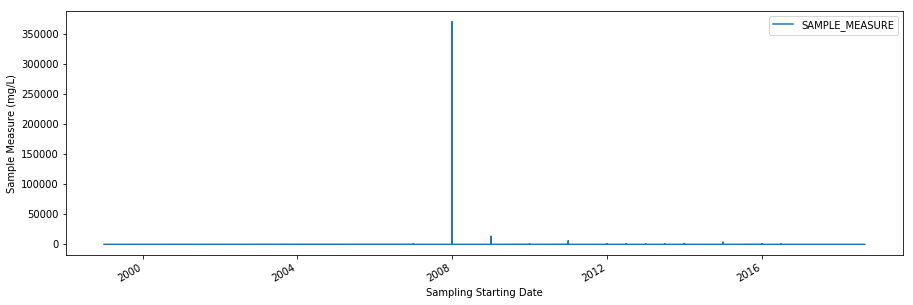

In [29]:
merged_sample_data.plot(x='SAMPLING_START_DATE', y='SAMPLE_MEASURE', figsize=(15,5))
plt.xlabel("Sampling Starting Date")
plt.ylabel("Sample Measure (mg/L)")
plt.show()

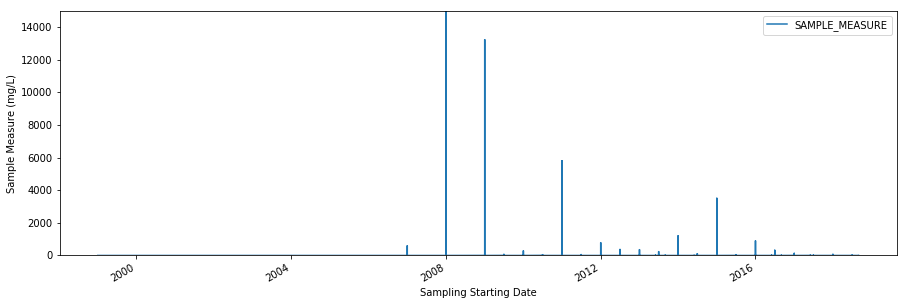

In [32]:
merged_sample_data.plot(x='SAMPLING_START_DATE', y='SAMPLE_MEASURE', figsize=(15,5))
plt.xlabel("Sampling Starting Date")
plt.ylabel("Sample Measure (mg/L)")
plt.ylim(0, 15000)
plt.show()

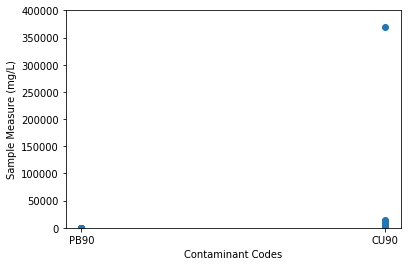

In [44]:
plt.scatter(merged_sample_data['CONTAMINANT_CODE'], merged_sample_data['SAMPLE_MEASURE'])
plt.xlabel("Contaminant Codes")
plt.ylabel("Sample Measure (mg/L)")
plt.ylim(0, 400000)
plt.show()

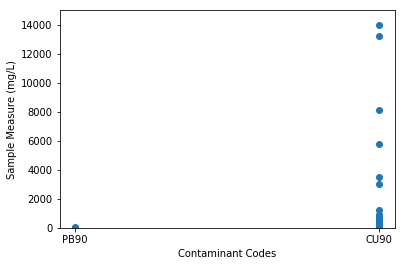

In [43]:
plt.scatter(merged_sample_data['CONTAMINANT_CODE'], merged_sample_data['SAMPLE_MEASURE'])
plt.xlabel("Contaminant Codes")
plt.ylabel("Sample Measure (mg/L)")
plt.ylim(0, 15000)
plt.show()

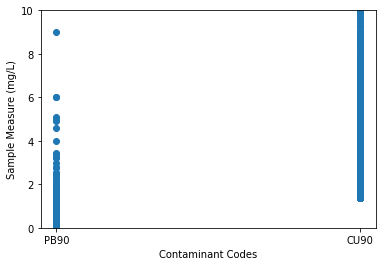

In [48]:
plt.scatter(merged_sample_data['CONTAMINANT_CODE'], merged_sample_data['SAMPLE_MEASURE'])
plt.xlabel("Contaminant Codes")
plt.ylabel("Sample Measure (mg/L)")
plt.ylim(0, 10)
plt.show()

In [50]:
merged_sample_data.CONTAMINANT_CODE.value_counts()

PB90    514232
CU90      9688
Name: CONTAMINANT_CODE, dtype: int64

## As we can see, although the sample concentration level (mg/L) of Copper (CU90) is much, much higher than Lead (PB90), there are far more sample records of lead contamination, PB90 is fare more dense than CU90, and since Lead is more toxic to the human body, we can run our first sub analysis on Lead.  

In [54]:
cmd = """
select * from WATER_SYSTEM
where PWS_ACTIVITY_CODE = "A"
"""
active_systems = pd.read_sql(cmd, db_connection)

In [55]:
active_systems.head(20)

,PWSID,PWS_NAME,NPM_CANDIDATE,PRIMACY_AGENCY_CODE,EPA_REGION,SEASON_BEGIN_DATE,SEASON_END_DATE,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,...,CITY_NAME,ZIP_CODE,COUNTRY_CODE,STATE_CODE,SOURCE_WATER_PROTECTION_CODE,SOURCE_PROTECTION_BEGIN_DATE,OUTSTANDING_PERFORMER,OUTSTANDING_PERFORM_BEGIN_DATE,CITIES_SERVED,COUNTIES_SERVED
0,010106001,Mashantucket Pequot Water System,1,01,1,None,None,A,None,CWS,...,MASHANTUCKET,06339-3060,US,CT,None,None,None,None,Not Reported,Not Reported
1,010109005,Mohegan Tribal Utility Authority,1,01,1,None,None,A,None,CWS,...,Uncasville,06382,US,CT,None,None,None,None,Not Reported,Not Reported
2,010307001,Aquinnah Wampanoag,1,01,1,None,None,A,None,CWS,...,Chilmark,02535,US,MA,None,None,None,None,Not Reported,Not Reported
3,010502002,Narragansett Indian Admin Building,1,01,1,01-01,12-31,A,None,NTNCWS,...,Charlestown,02813,US,RI,None,None,None,None,Not Reported,Not Reported
4,010502003,Narragansett Four Winds Community Center,1,01,1,01-01,12-31,A,None,NTNCWS,...,Charlestown,02813,US,RI,None,None,None,None,Not Reported,Not Reported
5,020000001,JIMMERSONTOWN WS,1,02,2,None,None,A,None,CWS,...,SALAMANCA,14779,US,NY,None,None,None,None,Not Reported,Not Reported
6,020000004,STEAMBURG WS,1,02,2,None,None,A,None,CWS,...,SALAMANCA,14779,US,NY,None,None,None,None,Not Reported,Not Reported
7,020000005,ST. REGIS MOHAWK TRIBE,1,02,2,None,None,A,None,CWS,...,HOGANSBURG,13655,US,NY,None,None,None,None,Not Reported,Not Reported
8,020000007,HIGHBANKS CAMPGROUND,1,02,2,01-01,12-31,A,None,TNCWS,...,SALAMANCA,14779,US,NY,None,None,None,None,Not Reported,Not Reported
9,020000008,CATTARAUGUS CWS,1,02,2,None,None,A,None,CWS,...,SALAMANCA,14779,US,NY,None,None,None,None,Not Reported,Not Reported


### Get the violations where the water system is active:

In [73]:
cmd = """
SELECT *
FROM VIOLATION
WHERE PWSID IN (SELECT PWSID FROM WATER_SYSTEM 
where PWS_ACTIVITY_CODE = "A"
)
"""

df = pd.read_sql(cmd, db_connection)

In [75]:
df.head()

,PWSID,ID,VIOLATION_ID,FACILITY_ID,POPULATION_SERVED_COUNT,NPM_CANDIDATE,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PRIMARY_SOURCE_CODE,POP_CAT_5_CODE,...,LATEST_ENFORCEMENT_ID,RTC_ENFORCEMENT_ID,RTC_DATE,PUBLIC_NOTIFICATION_TIER,ORIGINATOR_CODE,SAMPLE_RESULT_ID,CORRECTIVE_ACTION_ID,RULE_CODE,RULE_GROUP_CODE,RULE_FAMILY_CODE
0,MS0730004,00000444-92b9-428b-9953-461a5adb95ad,20414,33301,2553,N,A,,GW,2,...,71,71,2012-12-31,3,S,,,340,300,340
1,NY1316696,00000e0a-44f5-4809-8fa4-d03c59fe6030,44051,,104,N,A,,GW,1,...,2920,2920,2016-10-04,3,S,,,310,300,310
2,WV3305539,0000114b-e6eb-4548-8b8a-350803638ca9,60895,,123,N,A,,GWP,1,...,#1602400,,0000-00-00,3,S,,,210,200,210
3,PA7010048,000023f4-a59e-4461-a816-70a3152e7142,1416332,101,760,N,A,,GW,2,...,151633226001,151633226001,2015-01-21,3,S,,,140,100,140
4,AZ0413116,00002eb1-1fa2-460a-9be4-be760a5a972e,829,10472,1200,N,A,,GW,2,...,835,835,2010-11-04,2,S,,,332,300,330


In [168]:
df.columns

Index(['PWSID', 'ID', 'VIOLATION_ID', 'FACILITY_ID', 'POPULATION_SERVED_COUNT',
       'NPM_CANDIDATE', 'PWS_ACTIVITY_CODE', 'PWS_DEACTIVATION_DATE',
       'PRIMARY_SOURCE_CODE', 'POP_CAT_5_CODE', 'PRIMACY_AGENCY_CODE',
       'EPA_REGION', 'PWS_TYPE_CODE', 'VIOLATION_CODE',
       'VIOLATION_CATEGORY_CODE', 'IS_HEALTH_BASED_IND', 'CONTAMINANT_CODE',
       'COMPLIANCE_STATUS_CODE', 'VIOL_MEASURE', 'UNIT_OF_MEASURE',
       'STATE_MCL', 'IS_MAJOR_VIOL_IND', 'SEVERITY_IND_CNT',
       'COMPL_PER_BEGIN_DATE', 'COMPL_PER_END_DATE', 'LATEST_ENFORCEMENT_ID',
       'RTC_ENFORCEMENT_ID', 'RTC_DATE', 'PUBLIC_NOTIFICATION_TIER',
       'ORIGINATOR_CODE', 'SAMPLE_RESULT_ID', 'CORRECTIVE_ACTION_ID',
       'RULE_CODE', 'RULE_GROUP_CODE', 'RULE_FAMILY_CODE'],
      dtype='object')

### Let's see how many violations this is:

In [82]:
len(df.index)

1664916

### And how many systems this is:

In [114]:
len(df['PWSID'].unique())

107044

### Check to see if dataframe has any null values:

In [165]:
df.columns[df.isnull().any()].tolist()

[]

### None of the values are Null in the DF. That's good. 
### Now let's look at the severity of these violations
- IS_MAJOR_VIOL_IND = A code value that indicates the severity of a Monitoring and Reporting (M) violation, major or minor. The major versus minor designation does not apply to a sanitary survey M violation.

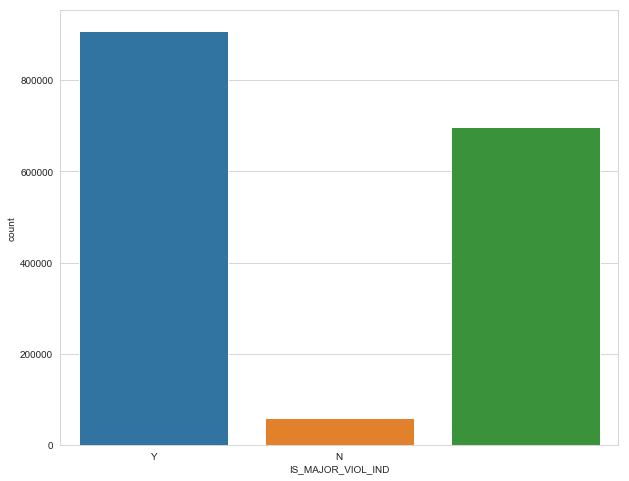

In [177]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')
sb.countplot(x='IS_MAJOR_VIOL_IND',data=df)
plt.show()

### And what about the Health Based Violations:
- Indicates if this is a health based violation (Y) or not (N).

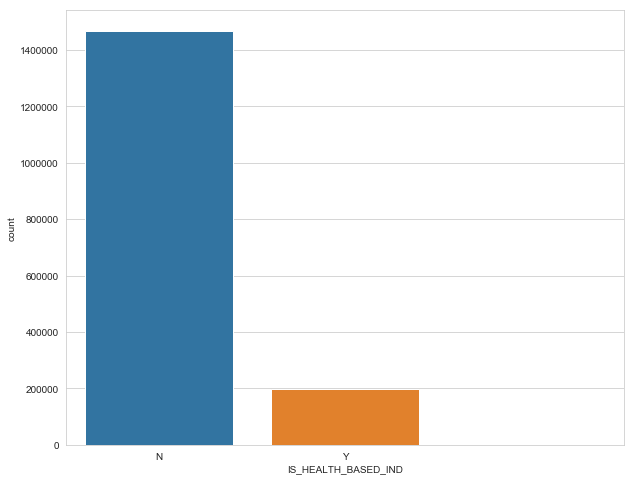

In [181]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')
sb.countplot(x='IS_HEALTH_BASED_IND',data=df)
plt.show()

In [230]:
df['COMPL_PER_BEGIN_DATE'] = pd.to_datetime(df['COMPL_PER_BEGIN_DATE'], format='%Y-%m-%d')

/Users/victorclarke/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


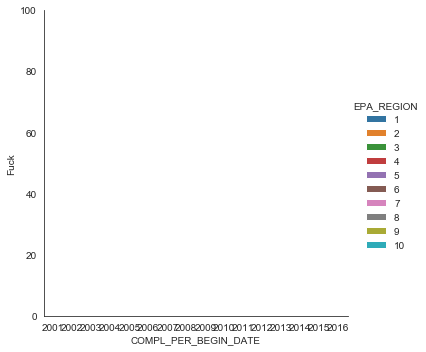

In [237]:
with sns.axes_style('white'):
    g = sns.factorplot("COMPL_PER_BEGIN_DATE", data=df, aspect=4.0, kind='count',
                       hue='EPA_REGION', order=range(2001, 2017))
    g.set_ylabels('Fuck')
    g.set(ylim=(0,100))

### Get the waster system facilities where the water system is active:

In [238]:
cmd = """
SELECT *
FROM WATER_SYSTEM_FACILITY
WHERE PWSID IN (SELECT PWSID FROM WATER_SYSTEM 
where PWS_ACTIVITY_CODE = "A"
)
"""

facilities = pd.read_sql(cmd, db_connection)

In [239]:
facilities.head(100)

,PWSID,ID,PRIMACY_AGENCY_CODE,EPA_REGION,FACILITY_ID,FACILITY_NAME,STATE_FACILITY_ID,FACILITY_ACTIVITY_CODE,FACILITY_DEACTIVATION_DATE,FACILITY_TYPE_CODE,...,WATER_TYPE_CODE,AVAILABILITY_CODE,SELLER_TREATMENT_CODE,SELLER_PWSID,SELLER_PWS_NAME,FILTRATION_STATUS_CODE,PWS_ACTIVITY_CODE,PWS_DEACTIVATION_DATE,PWS_TYPE_CODE,IS_SOURCE_TREATED_IND
0,WA5329887,00000506-c845-43a0-987c-a79f8092850f,WA,10,14972,WELL #1 NO TAG,001,I,1989-07-01,WL,...,GW,P,,,,,A,0000-00-00,NTNCWS,
1,WA5302600,00000c66-1bf9-44ce-92e4-297b205afbca,WA,10,2898,Well #20 AKY539 12 X 8 X 6,018,A,0000-00-00,WL,...,GW,P,,,,,A,0000-00-00,CWS,
2,KS2002107,000011b8-b1f4-427c-bac2-e5030939ffff,KS,7,1088,"""WELL 02","DS1""",00032175,0000-00-00,,...,1,GW,P,,,,,0000-00-00,,CWS
3,NC0472025,000024a5-0e42-4948-b09f-ddd1ccb17dd9,NC,4,8259,TREATMENT_PLT_BETHEL AREA WTP,WT1,A,0000-00-00,TP,...,,,,,,,A,0000-00-00,CWS,
4,VA6113195,000032e4-9f62-4f43-b3ac-4794572a7e51,VA,3,12458,1K TANK,ST001,A,0000-00-00,ST,...,,,,,,,A,0000-00-00,CWS,
5,TX1011256,00004109-6ff4-443e-867f-1baae1c44435,TX,6,82941,24222 PALO DURA DR - 850 GPM - SP,PF13973,A,0000-00-00,PF,...,,,,,,,A,0000-00-00,CWS,
6,MN5560689,00006aee-be2c-45e2-81c4-51cfa0fd2d92,MN,5,4,WELL #2 EP,,I,2005-12-02,SS,...,,,,,,,A,0000-00-00,TNCWS,
7,PA6530013,00006fae-8e18-4b89-8900-cea083d4db0c,PA,3,302,WELL #2,,A,0000-00-00,TP,...,,,,,,,A,0000-00-00,CWS,
8,ME0094443,00007889-2473-450c-8140-9a14a7ead531,ME,1,6615,HISTORICAL DATA,HISTORICAL,A,0000-00-00,SS,...,,,,,,,A,0000-00-00,NTNCWS,
9,OH6602412,00008842-1553-448e-b81a-a0d0d3bad64d,OH,5,927,YANKEE HILL,ST19049,A,0000-00-00,ST,...,,,,,,,A,0000-00-00,CWS,


In [ ]:
cmd = """
SELECT *
FROM WATER_SYSTEM_FACILITY
WHERE PWSID IN (SELECT PWSID FROM WATER_SYSTEM 
where PWS_ACTIVITY_CODE = "A"
)
"""

facilities = pd.read_sql(cmd, db_connection)